# Introduction to Python III

In this notebook, we work through a typical data science exploratory analysis workflow: 
1. Read in some data (using `pandas`)
2. Look at the raw data (`pandas`)
3. Compute some statistics (`pandas`)
4. Make some visualizations (`matplotlib`, `seaborn`, `plotly`)

## Introduction to `Pandas`
So, what is `Pandas`?

Not this: 

<img src="https://github.com/clemsonciti/rcde_workshops/blob/master/python_programming/pandas.jpg?raw=true" alt="Cute pandas" width="400"/>


More like this: 

<img src="https://github.com/clemsonciti/rcde_workshops/blob/master/python_programming/excel.png?raw=true" alt="Excel" width="400"/>

But with `code`!

<img src="https://github.com/clemsonciti/rcde_workshops/blob/master/python_programming/pandas_code.png?raw=true" alt="Code pandas" width="400"/>

You may feel that removing the graphical interface from the spreadsheet is a step backwards. However, swapping buttons for `code` makes us much more efficient at complicated tasks (once we get used to it)


### Loading the library

In [1]:
# pandas is usually aliased as "pd"
import pandas as pd

### Reading in data

We will use the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

In [2]:
# we can read in data from many formats. comma-separated values (csv) is a common one
# this csv is located at a url. It could just as easily be a file on your computer.
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

When we read in the data, pandas creates a "dataframe" object. This is analogous to a spreadsheet in Excel.

In [3]:
type(df)

pandas.core.frame.DataFrame

No-one really knows the full extent of things you can do with a pandas dataframe (hyperbole). 

You can browse the methods here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


### Basic attributes
First, let's consider a few simple attributes:

In [4]:
# the columns:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [5]:
# the first few rows:
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [6]:
# the shape of the dataframe:
df.shape  # number of rows, number of columns

(150, 5)

In [7]:
# the data types of the columns:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

### Selecting data

In [8]:
# we can select a single column by name:
df['petal.width']
# an individial column is called a "series" in pandas

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal.width, Length: 150, dtype: float64

In [9]:
# we can select multiple columns by name:
df[['petal.width', 'petal.length']]

petal.width  petal.length
0            0.2           1.4
1            0.2           1.4
2            0.2           1.3
3            0.2           1.5
4            0.2           1.4
..           ...           ...
145          2.3           5.2
146          1.9           5.0
147          2.0           5.2
148          2.3           5.4
149          1.8           5.1

[150 rows x 2 columns]

In [10]:
# we can select rows by index:
df.loc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [11]:
# we can select multiple rows by index:
df.loc[0:5]
# notice: the range is inclusive on both ends! why?

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa

In [12]:
# we can select specific elements by row and column:
df.loc[0, 'petal.width']

0.2

In [13]:
# we can select a range of elements by row and column ranges: 
df.loc[0:5, 'petal.width':'variety']

petal.width variety
0          0.2  Setosa
1          0.2  Setosa
2          0.2  Setosa
3          0.2  Setosa
4          0.2  Setosa
5          0.4  Setosa

### Basic math manipulations

In [14]:
# we can take the average of a column
df['petal.length'].mean()

# there are lots of other options we can perform, for example: min, max, median, mode, std, var, sum, count, etc.

3.7580000000000027

In [15]:
# what if we wanted to know the average of sepal.length and sepal.width for each sample?
df[['sepal.length', 'sepal.width']].mean(axis=1)

# here we use "axis=1" to specify that we are taking the average along the row rather than down the column.

0      4.30
1      3.95
2      3.95
3      3.85
4      4.30
       ... 
145    4.85
146    4.40
147    4.75
148    4.80
149    4.45
Length: 150, dtype: float64

In [16]:
# let's store this as a new column
df['sepal.mean'] = df[['sepal.length', 'sepal.width']].mean(axis=1)

df

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     sepal.mean  
0          4.30  
1          3.95  
2          3.95  
3          3.85  
4          4.30  
..          ...  
145        4.85  
146        4.40  
147        4.75  
148        4.80  
149        4.45  

[150 rows x 6 columns]

In [17]:
# we could also have computed the mean by directly manipulating the columns:
df['sepal.mean.2'] = (df['sepal.length'] + df['sepal.width']) / 2

df

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     sepal.mean  sepal.mean.2  
0          4.30          4.30  
1          3.95          3.95  
2          3.95          3.95  
3          3.85          3.85  
4          4.30          4.30  
..          ...           ...  
145        4.85          4.85  
146        4.40          4.40  
147        4.75          4.75  
148        4.80          4.80  
149        4.45          4.45  

[150 rows x 7 columns]

### Save to a file 

In [18]:
# we can write the modified dataframne to a new csv file
df.to_csv('iris_with_means.csv')

## Powerful data manipulation with "Split, Apply, Combine"
"Split, Apply, Combine" refers to the common practice of splitting up a dataset into relevant chunks, doing some computation on those chunks, then combining the output into a single table. In pandas, we can break up the data into groups using the `groupby` method. We can then apply our computation on the grouped data. If we set things up right, pandas will combine the results automatically. [Image credit](https://andeekaplan.com/images/blog/01202014split-apply-combine.png). 

![Split apply combine](https://raw.githubusercontent.com/clemsonciti/rcde_workshops/master/fig/split-apply-combine.png)

In [19]:
# load the original iris dataset file
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

### `groupby`

Group by allows us to split up the data. 

In [20]:
# what do we get just call groupby? 
df.groupby('variety')
# answer: a special DataFrameGroupBy object

In [21]:
# we can iterate over this data structure manually: 
for g, d in df.groupby('variety'): 
    print(g)
    display(d.head(2))

Setosa


sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa

Versicolor


sepal.length  sepal.width  petal.length  petal.width     variety
50           7.0          3.2           4.7          1.4  Versicolor
51           6.4          3.2           4.5          1.5  Versicolor

Virginica


sepal.length  sepal.width  petal.length  petal.width    variety
100           6.3          3.3           6.0          2.5  Virginica
101           5.8          2.7           5.1          1.9  Virginica

In [22]:
# we can even perform split-apply-combine manually
# for instance, we can compute the average 'sepal.length' for each set

variety = []
sepal_length = []

# 1. Split
for g, d in df.groupby('variety'): 
    variety.append(g)
    # 2. Apply:
    sepal_length.append(d['sepal.length'].mean())
    
# 3. Combine
pd.DataFrame({'variety': variety, 'sepal.length': sepal_length})

variety  sepal.length
0      Setosa         5.006
1  Versicolor         5.936
2   Virginica         6.588

In [23]:
# but this is such a common workflow that pandas makes it easy
df.groupby('variety', as_index=False)['sepal.length'].mean()

variety  sepal.length
0      Setosa         5.006
1  Versicolor         5.936
2   Virginica         6.588

In [24]:
# and, using the pandas way, we can compute the mean of all variables without writing more code
df.groupby('variety', as_index=False).mean()

variety  sepal.length  sepal.width  petal.length  petal.width
0      Setosa         5.006        3.428         1.462        0.246
1  Versicolor         5.936        2.770         4.260        1.326
2   Virginica         6.588        2.974         5.552        2.026

In [25]:
# we can even compute multiple metrics per column using the `agg` method:
df.groupby('variety', as_index=False).agg(['mean', 'std', 'sem', 'count'])
# advanced note: because we have multiple functions for each variable, pandas has created a multi-index for the columns

sepal.length                           sepal.width            \
                   mean       std       sem count        mean       std   
variety                                                                   
Setosa            5.006  0.352490  0.049850    50       3.428  0.379064   
Versicolor        5.936  0.516171  0.072998    50       2.770  0.313798   
Virginica         6.588  0.635880  0.089927    50       2.974  0.322497   

                           petal.length                           petal.width  \
                 sem count         mean       std       sem count        mean   
variety                                                                         
Setosa      0.053608    50        1.462  0.173664  0.024560    50       0.246   
Versicolor  0.044378    50        4.260  0.469911  0.066455    50       1.326   
Virginica   0.045608    50        5.552  0.551895  0.078050    50       2.026   

                                      
                 std       sem count  
variety                               
Setosa      0.105386  0.014904    50  
Versicolor  0.197753  0.027966    50  
Virginica   0.274650  0.038841    50

In [26]:
# pretty colors if you want
df.groupby('variety').agg(['mean', 'std', 'sem', 'count']).style.background_gradient('Blues')

## `apply`

The above methods worked because pandas implements special "mean", "std", "sem", and "count"
for the grouped data frame object. But what if we want to apply some custom function
to the grouped data?  

For example, say we wanted to apply standard-normal scaling to the `sepal.length` variable within each
`variety` group? If $x$ is `sepal.length`, we want to compute a new variable 
$$
x' = \frac{x - \mu_x}{\sigma_x}
$$
where $\mu_x$ and $\sigma_x$ are computed separately within each `variety`.

How do we do this in pandas? This is where the `apply` method comes in. See [the documentation](https://pandas.pydata.org/docs/user_guide/groupby.html) for more tricks.

In [27]:
# first define a function that applies to a specific element
def standard_scaler(data):
    """Standardize the data"""
    return (data - data.mean()) / data.std()

# then use apply to loop the function over the column
df_scaled = df.set_index('variety').groupby('variety', group_keys=False).apply(standard_scaler)
df_scaled

sepal.length  sepal.width  petal.length  petal.width
variety                                                        
Setosa         0.266674     0.189941     -0.357011    -0.436492
Setosa        -0.300718    -1.129096     -0.357011    -0.436492
Setosa        -0.868111    -0.601481     -0.932836    -0.436492
Setosa        -1.151807    -0.865288      0.218813    -0.436492
Setosa        -0.017022     0.453749     -0.357011    -0.436492
...                 ...          ...           ...          ...
Virginica      0.176134     0.080621     -0.637803     0.997633
Virginica     -0.452916    -1.469783     -1.000191    -0.458766
Virginica     -0.138391     0.080621     -0.637803    -0.094666
Virginica     -0.610178     1.320944     -0.275415     0.997633
Virginica     -1.081966     0.080621     -0.818997    -0.822865

[150 rows x 4 columns]

Original variables:


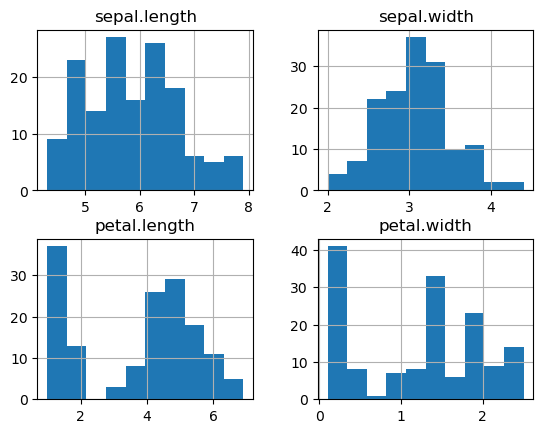

In [28]:
print("Original variables:")
_ = df.set_index('variety').hist()

Scaled variables:


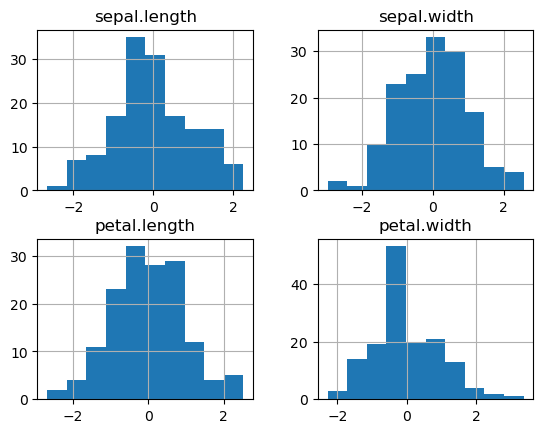

In [29]:
print("Scaled variables:")
_ = df_scaled.hist()

## `melt` and `pivot_table`

Often our data contains multiple measurements, with each measurement using one column. Sometimes, it is more convenient to place all of the measurements in a single column, with an additional column to indicate which measurement the value represents. 

Take for example the iris dataset. 

Original:

In [30]:
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Melted version:

In [31]:
df.melt(id_vars = ['variety'])

variety      variable  value
0       Setosa  sepal.length    5.1
1       Setosa  sepal.length    4.9
2       Setosa  sepal.length    4.7
3       Setosa  sepal.length    4.6
4       Setosa  sepal.length    5.0
..         ...           ...    ...
595  Virginica   petal.width    2.3
596  Virginica   petal.width    1.9
597  Virginica   petal.width    2.0
598  Virginica   petal.width    2.3
599  Virginica   petal.width    1.8

[600 rows x 3 columns]

Notice that this results in a narrower and longer dataframe.  By default, pandas assigns the names `variable` and `value` to the column giving the measurement name and the column holding the measurement itself, respectively. We can change these by passing in the right arguments:

In [32]:
df.melt(id_vars = ['variety'], var_name='measurement_name', value_name='measurement_value')

variety measurement_name  measurement_value
0       Setosa     sepal.length                5.1
1       Setosa     sepal.length                4.9
2       Setosa     sepal.length                4.7
3       Setosa     sepal.length                4.6
4       Setosa     sepal.length                5.0
..         ...              ...                ...
595  Virginica      petal.width                2.3
596  Virginica      petal.width                1.9
597  Virginica      petal.width                2.0
598  Virginica      petal.width                2.3
599  Virginica      petal.width                1.8

[600 rows x 3 columns]

---

**Question**: Why would we want to melt a dataframe? 

---

In [33]:
df_melted = df.melt(id_vars = ['variety'])

df_melted.head()

variety      variable  value
0  Setosa  sepal.length    5.1
1  Setosa  sepal.length    4.9
2  Setosa  sepal.length    4.7
3  Setosa  sepal.length    4.6
4  Setosa  sepal.length    5.0

In [34]:
df_melted.groupby(['variety', 'variable']).agg(['mean', 'sem'])

value          
                          mean       sem
variety    variable                     
Setosa     petal.length  1.462  0.024560
           petal.width   0.246  0.014904
           sepal.length  5.006  0.049850
           sepal.width   3.428  0.053608
Versicolor petal.length  4.260  0.066455
           petal.width   1.326  0.027966
           sepal.length  5.936  0.072998
           sepal.width   2.770  0.044378
Virginica  petal.length  5.552  0.078050
           petal.width   2.026  0.038841
           sepal.length  6.588  0.089927
           sepal.width   2.974  0.045608

Compare this with the same operation on the original data

In [35]:
df.groupby(['variety']).agg(['mean', 'sem'])

sepal.length           sepal.width           petal.length  \
                   mean       sem        mean       sem         mean   
variety                                                                
Setosa            5.006  0.049850       3.428  0.053608        1.462   
Versicolor        5.936  0.072998       2.770  0.044378        4.260   
Virginica         6.588  0.089927       2.974  0.045608        5.552   

                     petal.width            
                 sem        mean       sem  
variety                                     
Setosa      0.024560       0.246  0.014904  
Versicolor  0.066455       1.326  0.027966  
Virginica   0.078050       2.026  0.038841

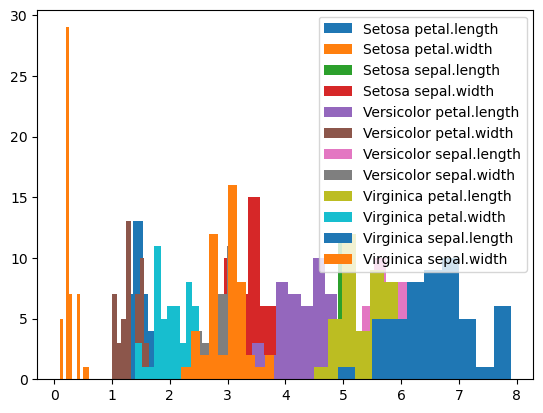

In [36]:
# with the melted data, we can easily plot the distribution of each variable for each variety
import matplotlib.pyplot as plt

for key, group in df_melted.groupby(['variety', 'variable']):
    plt.hist(group['value'], label=" ".join(key))
_ = plt.legend()

Compare with how we have to produce this plot from the original dataframe: 

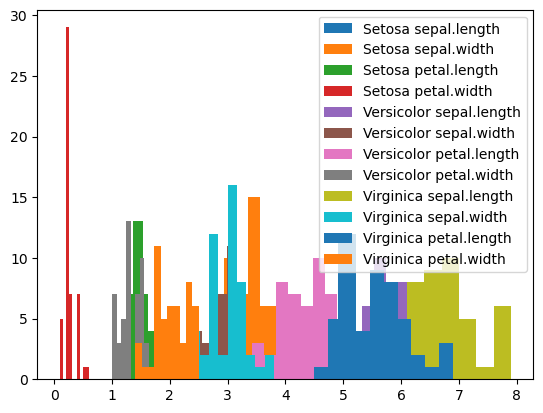

In [37]:
# with the original dataframe, we need a second for loop over the different columns we want to plot
for key, group in df.groupby('variety'):
    for col in ["sepal.length", "sepal.width", "petal.length", "petal.width"]:
        plt.hist(group[col], label=f"{key} {col}")
_ = plt.legend()

`pivot_table` is the conceptually the opposite of `melt`. It allows us to convert a column with variable names into multiple columns.

Let's use pivot table on our melted dataframe.  To do so, we need to specify the following:

* `index`: which columns will be used to uniquely specify the rows in the resulting dataframe. In this case, we want `variety`.
* `columns`: which columns will be converted into new columns in the resulting dataframe. In this case, we want `variable`.
* `values`: which column contains the values that will be used to populate the new dataframe. In this case, we want `value`.

In [38]:
df_melted.pivot_table(index = 'variety', columns='variable', values='value')

variable    petal.length  petal.width  sepal.length  sepal.width
variety                                                         
Setosa             1.462        0.246         5.006        3.428
Versicolor         4.260        1.326         5.936        2.770
Virginica          5.552        2.026         6.588        2.974

Notice that we only have 3 rows! This is because the provided index (`variety`) does not uniquely specify the original rows in our dataframe. When pivoting, pandas applied the default aggregation function -- `mean` -- to fill the cells. 

We can change the aggregation function as needed: 

In [39]:
df_melted.pivot_table(index = 'variety', columns='variable', values='value', aggfunc='max')

variable    petal.length  petal.width  sepal.length  sepal.width
variety                                                         
Setosa               1.9          0.6           5.8          4.4
Versicolor           5.1          1.8           7.0          3.4
Virginica            6.9          2.5           7.9          3.8

In [40]:
# here we provide a custom lambda aggfunc. This shows how pivot_table
# can be used to make nice human-readable tables
df_melted.pivot_table(index = 'variety', columns='variable', values='value', aggfunc=lambda x: f"{x.mean():0.2f}+/-{1.96*x.sem():0.2f}")

variable   petal.length  petal.width sepal.length  sepal.width
variety                                                       
Setosa      1.46+/-0.05  0.25+/-0.03  5.01+/-0.10  3.43+/-0.11
Versicolor  4.26+/-0.13  1.33+/-0.05  5.94+/-0.14  2.77+/-0.09
Virginica   5.55+/-0.15  2.03+/-0.08  6.59+/-0.18  2.97+/-0.09

## Understanding your data with distribution plots

### The "taxis" dataset

In [41]:
# seaborn is a popular plotting library that works well with pandas
import seaborn as sns

In [42]:
df = sns.load_dataset('taxis')
df

pickup              dropoff  passengers  distance  fare  \
0     2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1     2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2     2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3     2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4     2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
...                   ...                  ...         ...       ...   ...   
6428  2019-03-31 09:51:53  2019-03-31 09:55:27           1      0.75   4.5   
6429  2019-03-31 17:38:00  2019-03-31 18:34:23           1     18.74  58.0   
6430  2019-03-23 22:55:18  2019-03-23 23:14:25           1      4.14  16.0   
6431  2019-03-04 10:09:25  2019-03-04 10:14:29           1      1.12   6.0   
6432  2019-03-13 19:31:22  2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  
0                  UN/Turtle Bay South      Manhattan       Manhattan  
1                Upper West Side South      Manhattan       Manhattan  
2                         West Village      Manhattan       Manhattan  
3                       Yorkville West      Manhattan       Manhattan  
4                       Yorkville West      Manhattan       Manhattan  
...                                ...            ...             ...  
6428              Central Harlem North      Manhattan       Manhattan  
6429  East Concourse/Concourse Village         Queens           Bronx  
6430                    Bushwick North       Brooklyn        Brooklyn  
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn  
6432                   Windsor Terrace       Brooklyn        Brooklyn  

[6433 rows x 14 columns]

Questions we might want to answer based on this data:
* How does the fare depend on other factors like travel distance, number of passengers, time of day, and pickup zone? 
* What are the most common pickup and dropoff locations in the data? 
* What factors influence the travel time? 
* Do green cabs charge bigger fares than yellow cabs? 
* _Can you think of any other questions?_ 

Distribution plots / density plots can help us start to answer these questions. 

#### **Histogram for 1D data**

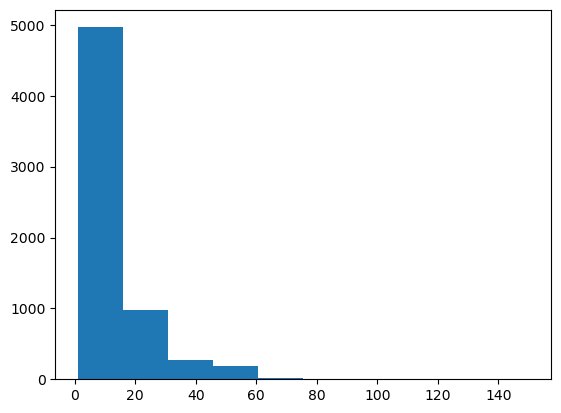

In [43]:
_ = plt.hist(df.fare)

Problems: 
* No labels
* Not enough bins

Let's improve this histogram

Text(0, 0.5, 'Count')

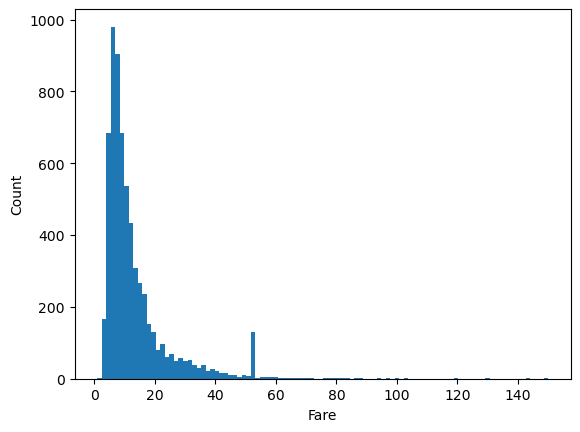

In [44]:
plt.hist(df.fare, bins=100)
plt.xlabel('Fare')
plt.ylabel('Count')

That's much better, but there's a lot of wasted space due to some very high Fare values. Let's manually set the limit to get rid of this.

(0.0, 80.0)

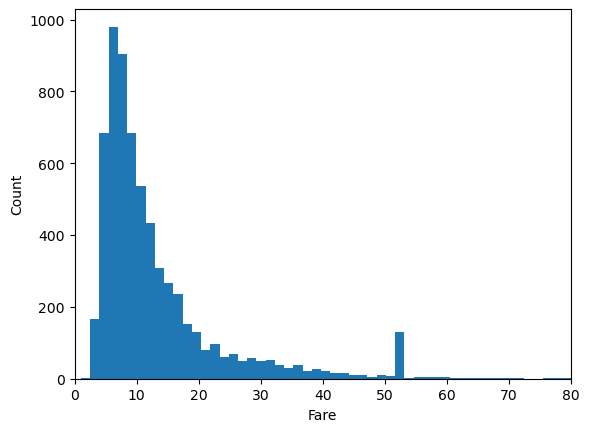

In [45]:
plt.hist(df.fare, bins=100)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(0,80)

Given the nature of the distribution, we may wish to put the x-axis on a log scale.

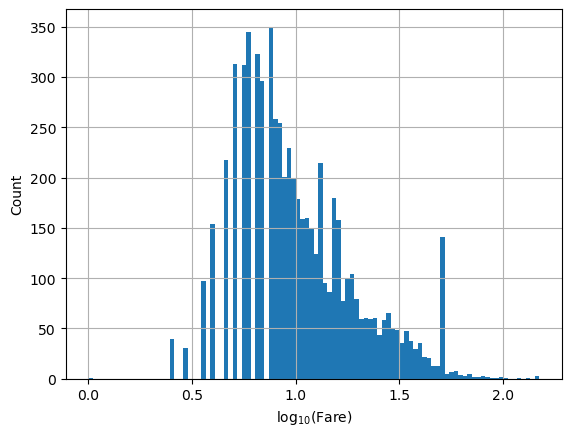

In [46]:
# we need the numpy library to take the log of the fare
import numpy as np

# we can do this by taking the log of the fare, in which case the bins are uniform in log space...
plt.hist(np.log10(df.fare), bins=100)
plt.xlabel(r'$\log_{10}(\mathrm{Fare})$')
plt.ylabel('Count')
plt.grid()

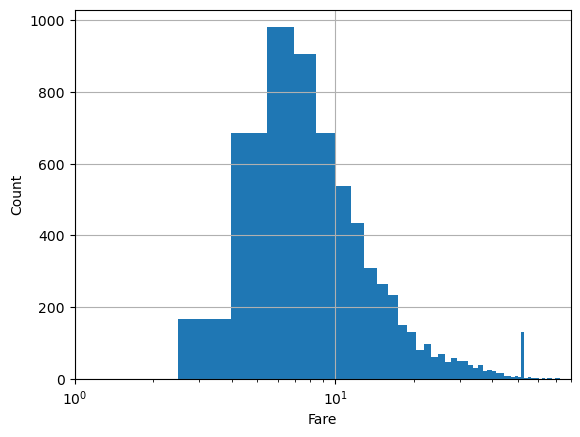

In [47]:
# or by converting the axis to log-scale after the fact. In this case, bins are non-uniform
# in log space.
plt.hist(df.fare, bins=100)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(1,80)
plt.semilogx()
plt.grid()

By default, `hist` gives number of samples for the y axis. Sometimes, we want the percentage of samples in the bin instead. 

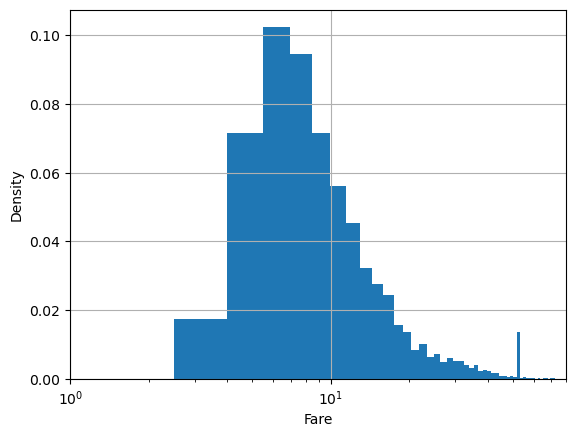

In [48]:
plt.hist(df.fare, bins=100, density=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.xlim(1,80)
plt.semilogx()
plt.grid()

Sometimes we want the log-density instead: 

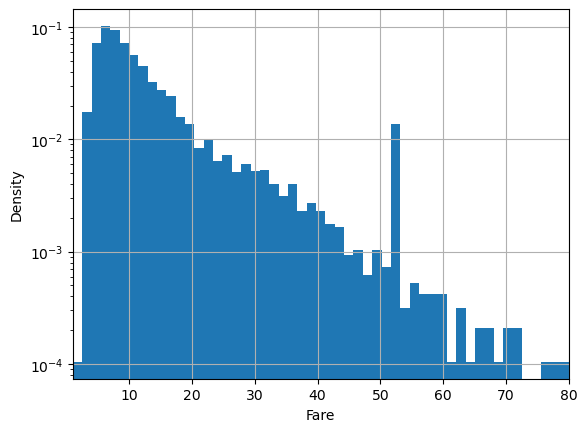

In [49]:
plt.hist(df.fare, bins=100, density=True, log=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.xlim(1,80)
plt.grid()

#### **Kernel Density Estimation** 
Sometimes we want smooth approximations to our data distribution. Smooth approximations can show us the underlying pattern while removing noise due to small sample size. Kernel Density Estimation is just a fancy name for a method of fitting smooth approximations to data distributions. The `seaborn` library, which we loaded with alias `sns` provides convenient methods for fitting and plotting kernel density estimates. 

<AxesSubplot:xlabel='fare', ylabel='Density'>

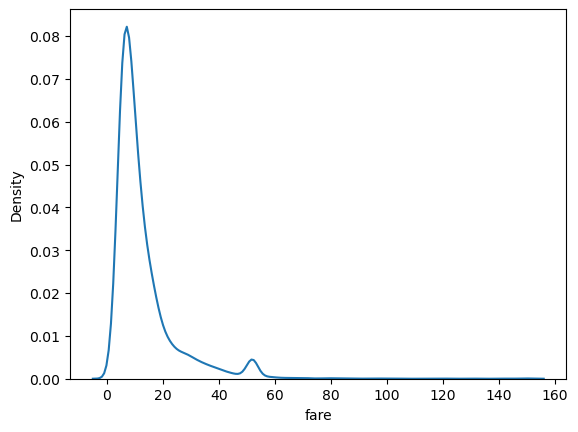

In [50]:
sns.kdeplot(data=df, x='fare')

Seaborn functions like kdeplot have about a jillion arguments

In [51]:
sns.kdeplot?

Signature:
sns.kdeplot(
    x=None,
    *,
    y=None,
    shade=None,
    vertical=False,
    kernel=None,
    bw=None,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cumulative=False,
    shade_lowest=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    weights=None,
    hue=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    levels=10,
    thresh=0.05,
    bw_method='scott',
    bw_adjust=1,
    log_scale=None,
    color=None,
    fill=None,
    data=None,
    data2=None,
    warn_singular=True,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analagous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further 

But seaborn uses matplotlib under the hood. So we can use some matplotlib commands to customize the look.

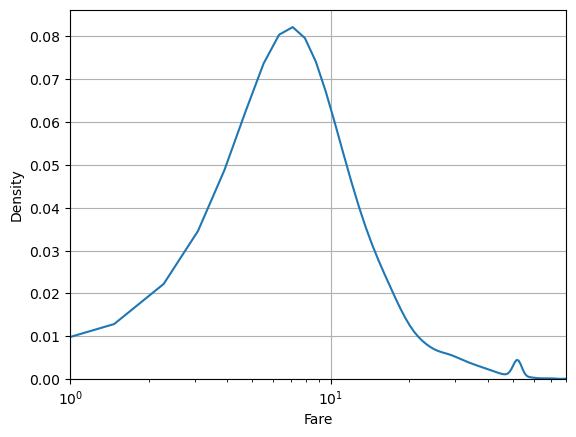

In [52]:
sns.kdeplot(data=df, x='fare')
plt.xlabel('Fare')
plt.xlim(1,80)
plt.semilogx()
plt.grid()

In KDE, it's important to correctly set the smoothness parameter called `bw_method` for bin width method. Too large and you remove important structure in your data. Too small and you are fitting the noise. 

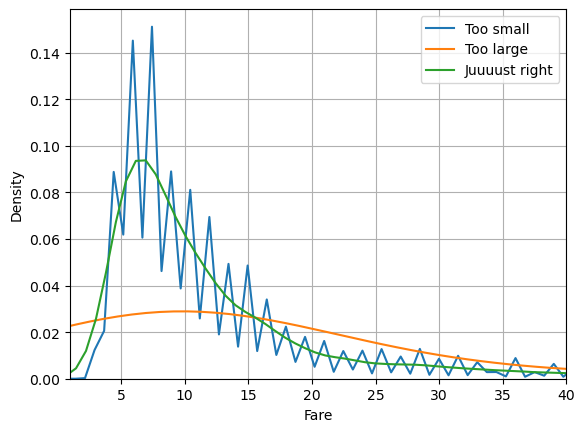

In [53]:
sns.kdeplot(data=df, x='fare', bw_method=0.01, label='Too small')
sns.kdeplot(data=df, x='fare', bw_method=1, label='Too large')
sns.kdeplot(data=df, x='fare', bw_method=0.1, label='Juuuust right')
plt.xlabel('Fare')
plt.xlim(1,40)
plt.grid()
plt.legend()

It can be useful to compare with a histogram to make sure you're getting it right: 

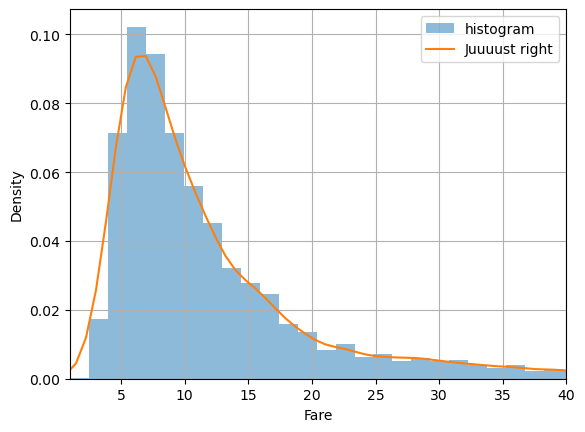

In [54]:
plt.hist(df.fare, bins=100, label='histogram', density=True, alpha=0.5)
sns.kdeplot(data=df, x='fare', bw_method=0.1, label='Juuuust right')
plt.xlabel('Fare')
plt.xlim(1,40)
plt.grid()
plt.legend()

Seaborn makes it easy to group our data:

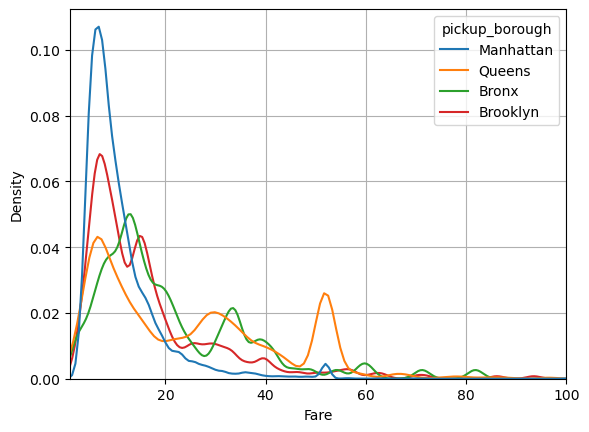

In [55]:
df.passengers = df.passengers.astype(str)
sns.kdeplot(data=df, x='fare', hue='pickup_borough', bw_method=0.1, common_norm=False)
plt.xlabel('Fare')
plt.xlim(1,100)
plt.grid()

#### **Kernel Density Estimation in 2D** 

Kernel Density Estimation is especially useful in 2D. 

Let's return to the iris dataset and take, for instance, the distribution of `petal_length` and `sepal_length`

In [56]:
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

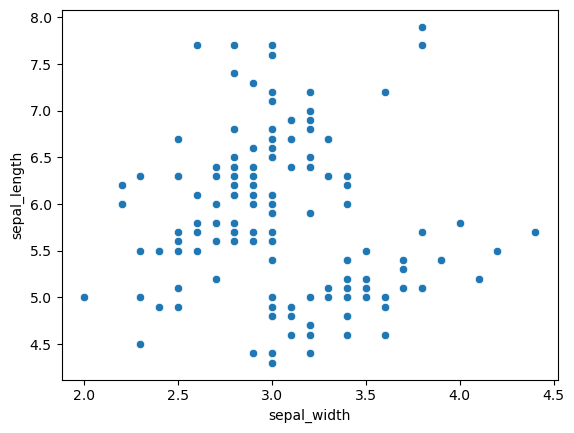

In [57]:
sns.scatterplot(data=df, x='sepal_width', y='sepal_length')

It looks like there are two groupings in the data. We can use KDE in two dimensions to visualize the distribution more clearly.

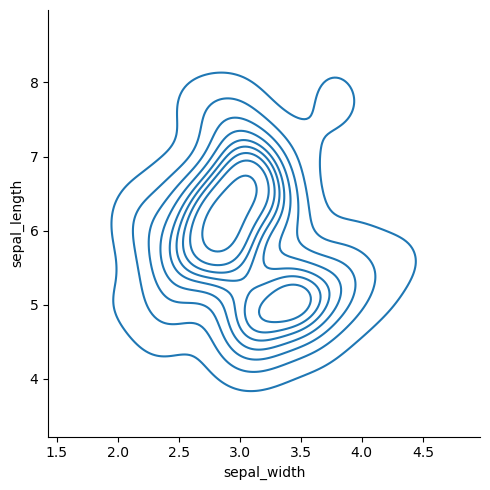

In [58]:
sns.displot(df, x='sepal_width', y='sepal_length', kind='kde')

The data looks bi-modal. That is, there are two peaks. What could explain these two peaks?  

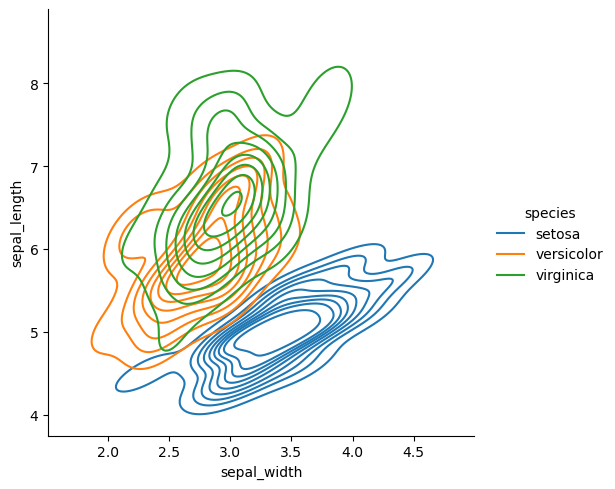

In [59]:
sns.displot(df, x='sepal_width', y='sepal_length', hue='species', kind='kde')

Now we can clearly see where the two peaks are coming from. 

There are many ways to style the kde plots. 

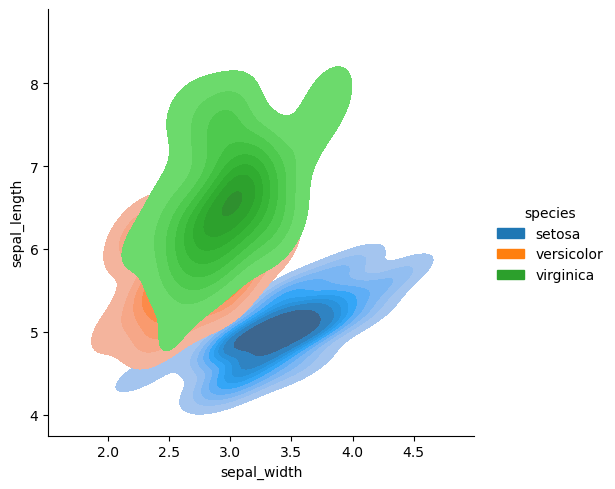

In [60]:
sns.displot(data=df, x='sepal_width', y='sepal_length', hue='species', fill=True, kind='kde')

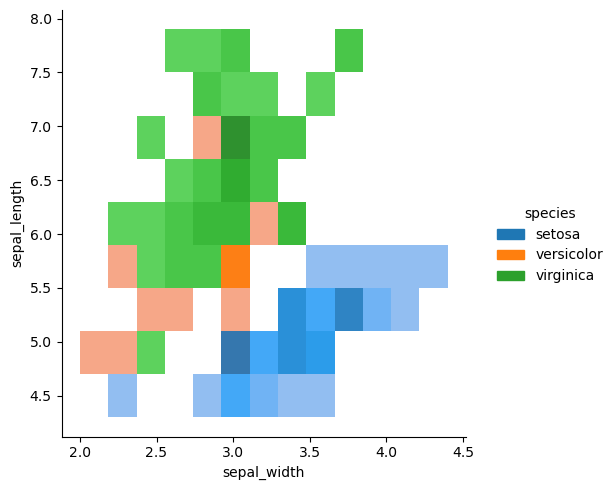

In [61]:
sns.displot(data=df, x='sepal_width', y='sepal_length', hue='species')

Sometimes it's useful to see the marginal distributions

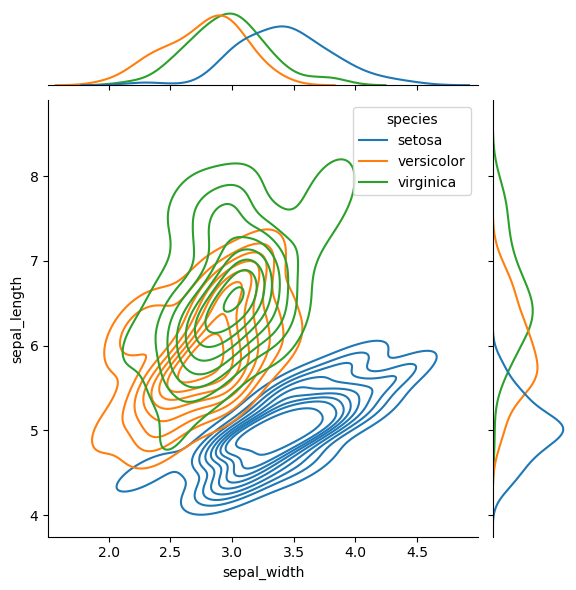

In [62]:
sns.jointplot(
    data=df,
    x='sepal_width', y='sepal_length', hue='species',
    kind="kde"
)

## Interactive plotting with Plotly
So far we have seen static visualizations made with matplotlib and seaborn. Though you can create interactive plots with these tools, it is a lot of work. 

Plotly is designed to be interactive out of the box.

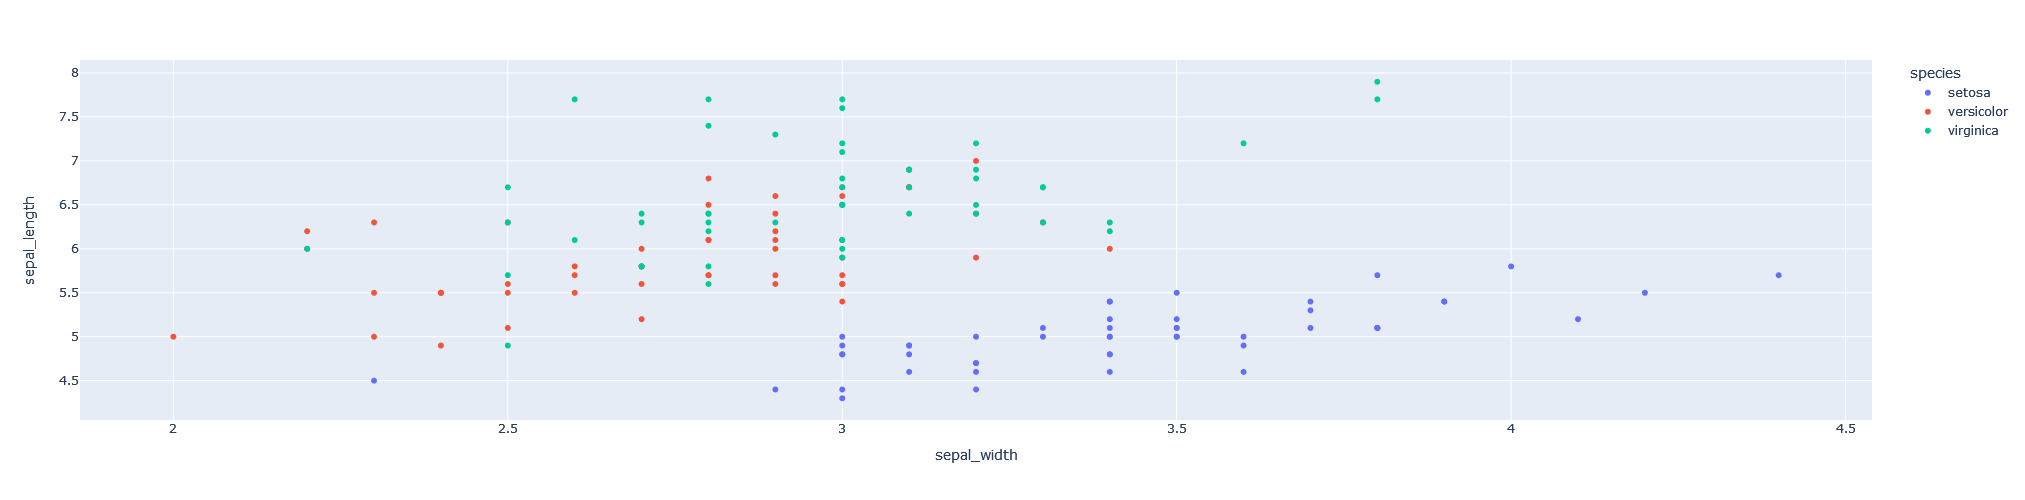

In [63]:
# import the plotly express library
import plotly.express as px

px.scatter(df, x='sepal_width', y='sepal_length', color='species', height=500, width=700)

Plotly has many impressive features. For instance, we can easily add groups and margin plots:

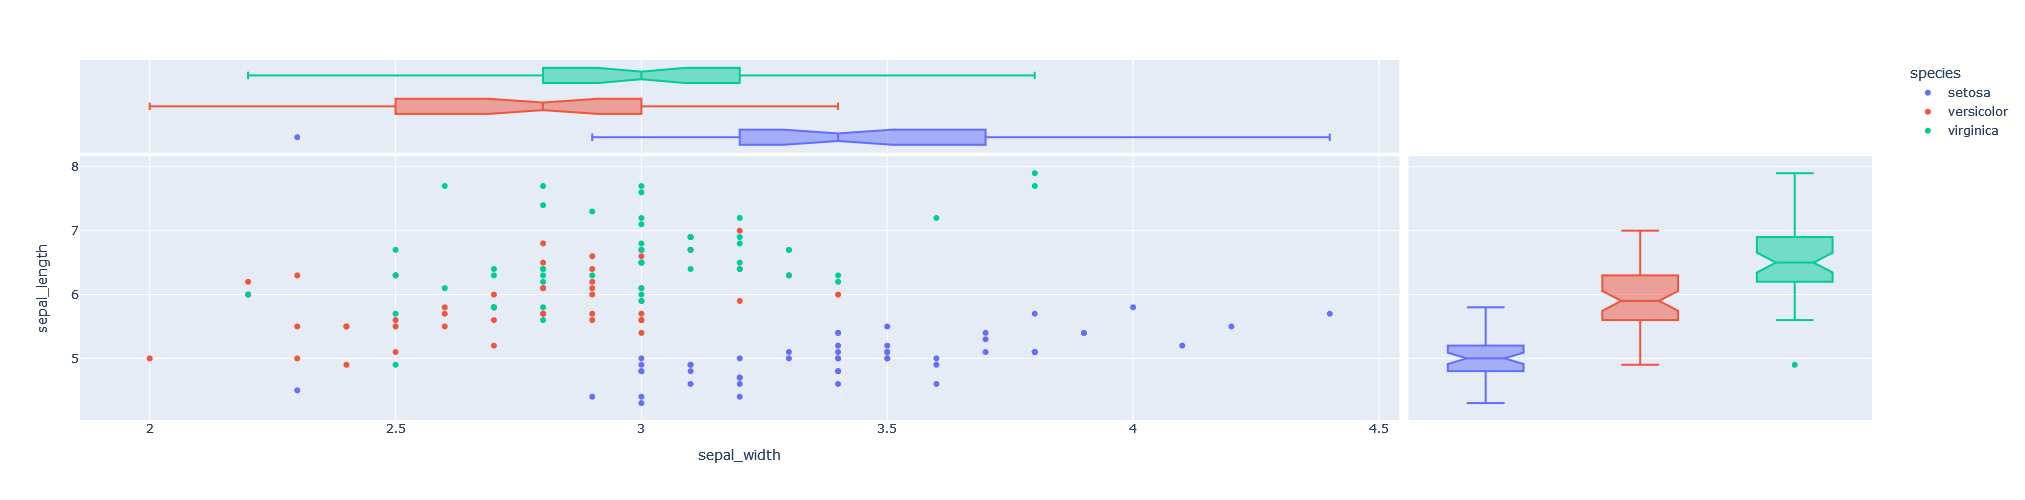

In [64]:
px.scatter(df, x='sepal_width', y='sepal_length', color='species', height=500, width=700, marginal_x='box', marginal_y='box')

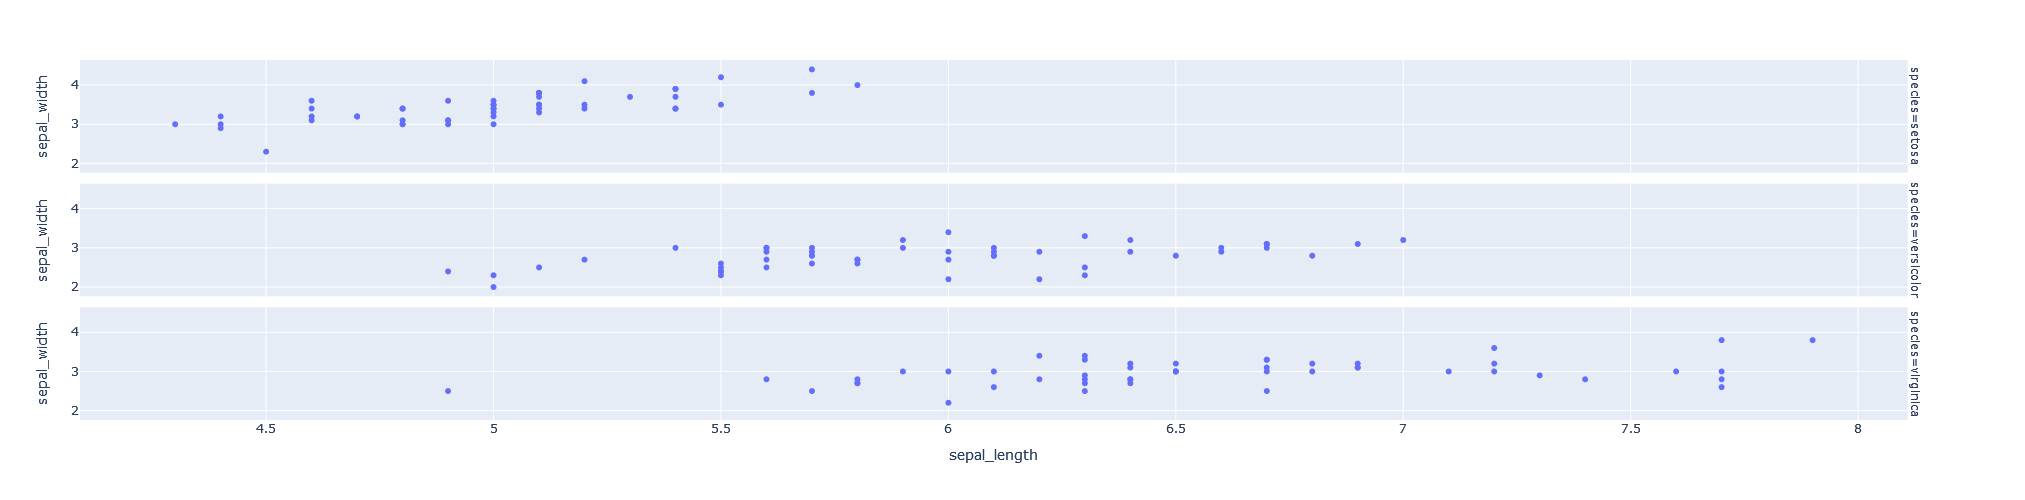

In [65]:
px.scatter(data_frame=df, x='sepal_length', y='sepal_width', facet_row='species', height=500, width=700)

We can modify the information available in the tooltip: 

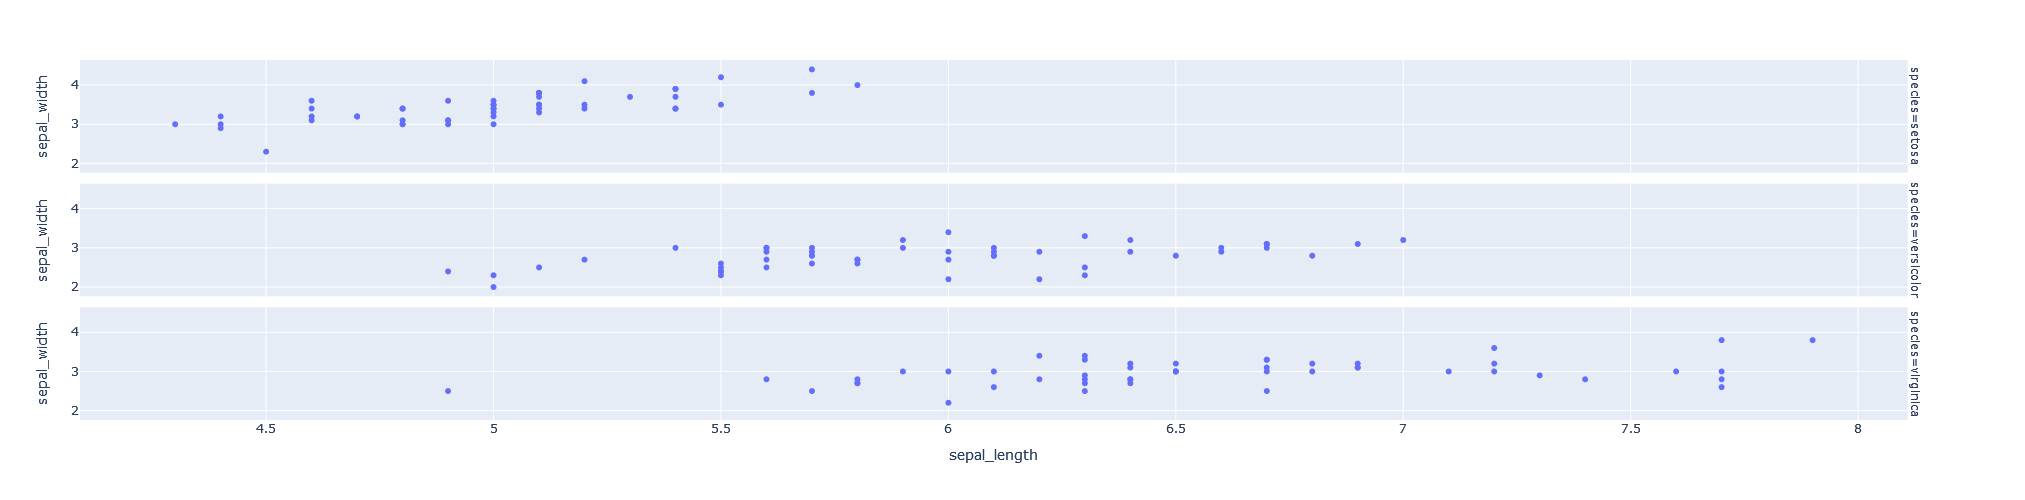

In [66]:
px.scatter(data_frame=df, x='sepal_length', y='sepal_width', facet_row='species', height=500, width=700,
          hover_data = ['petal_length', 'petal_width'])

We can even make density plots right in Plotly

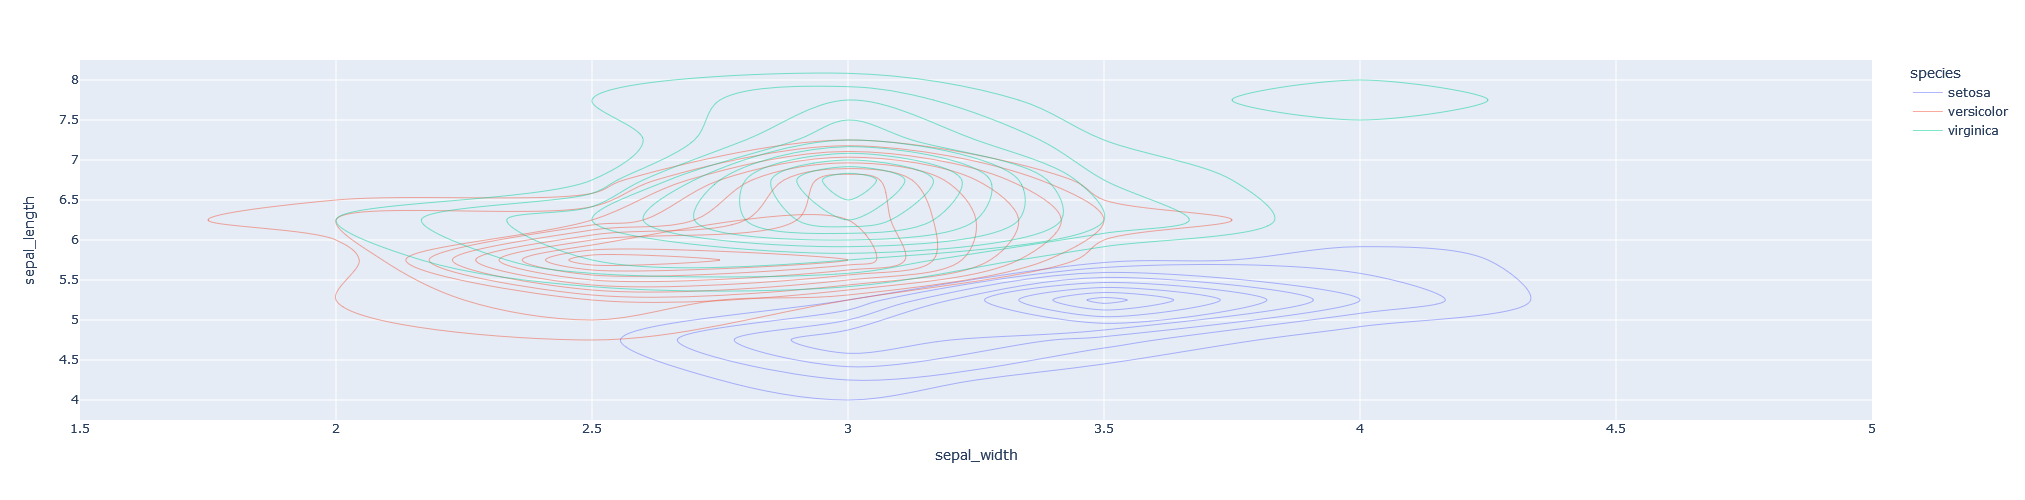

In [67]:
 px.density_contour(df, x="sepal_width", y="sepal_length", color='species', height=500, width=700)

### Animations
Plotly makes it very easy to create animations

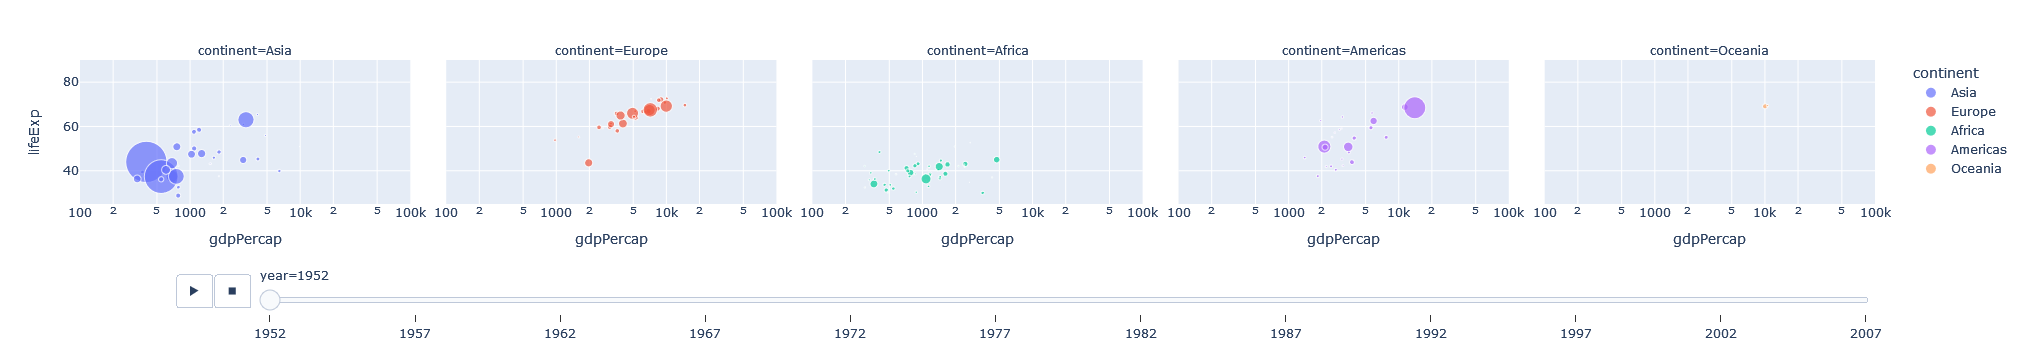

In [68]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

### Saving interactive plots
One of the great features of plotly is that you can save interactive features and run them in the browser. 

To demonstrate we will save the above interactive plot. Try opening the resulting html file in your browser. 

In [69]:
fig.write_html("animated_fig.html")